In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/iris.csv')

In [27]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.head().to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>sepal_length</th>\n      <th>sepal_width</th>\n      <th>petal_length</th>\n      <th>petal_width</th>\n      <th>species</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>5.1</td>\n      <td>3.5</td>\n      <td>1.4</td>\n      <td>0.2</td>\n      <td>setosa</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>4.9</td>\n      <td>3.0</td>\n      <td>1.4</td>\n      <td>0.2</td>\n      <td>setosa</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>4.7</td>\n      <td>3.2</td>\n      <td>1.3</td>\n      <td>0.2</td>\n      <td>setosa</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>4.6</td>\n      <td>3.1</td>\n      <td>1.5</td>\n      <td>0.2</td>\n      <td>setosa</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>5.0</td>\n      <td>3.6</td>\n      <td>1.4</td>\n      <td>0.2</td>\n      <td>setosa</td>\n    </tr>\n  </tbody>\n</

In [3]:
palette = ['#df3707', '#0d6efd', '#988ed5']

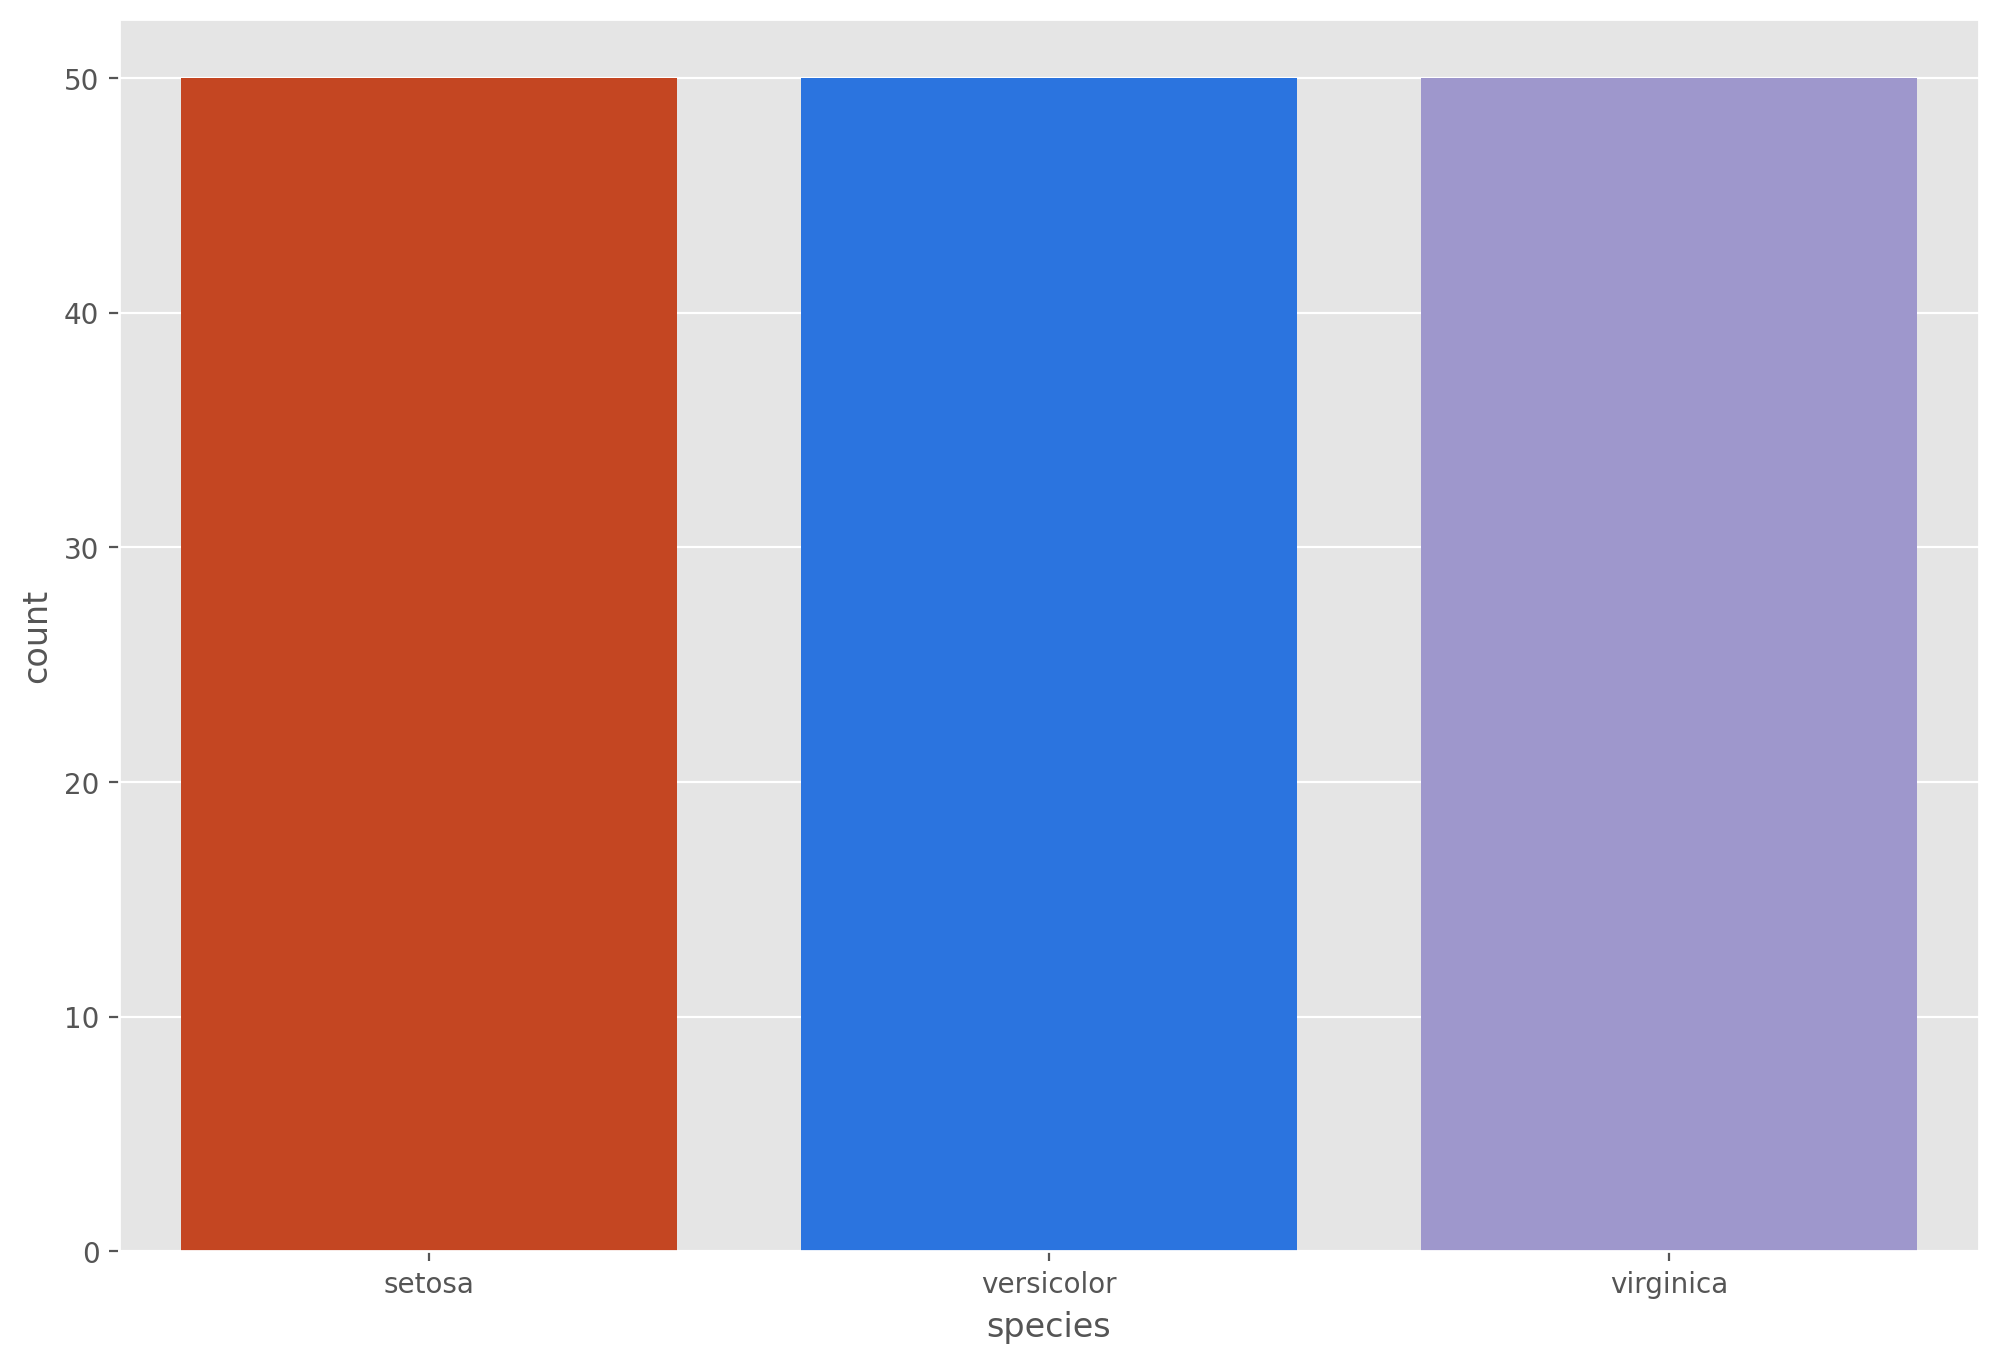

In [4]:
plt.style.use('ggplot')
plt.figure(figsize=(12,8),dpi=200)
sns.countplot(data=df,x='species',palette=palette)
plt.savefig('../static/iris/countplot.png')

<Figure size 2400x1600 with 0 Axes>

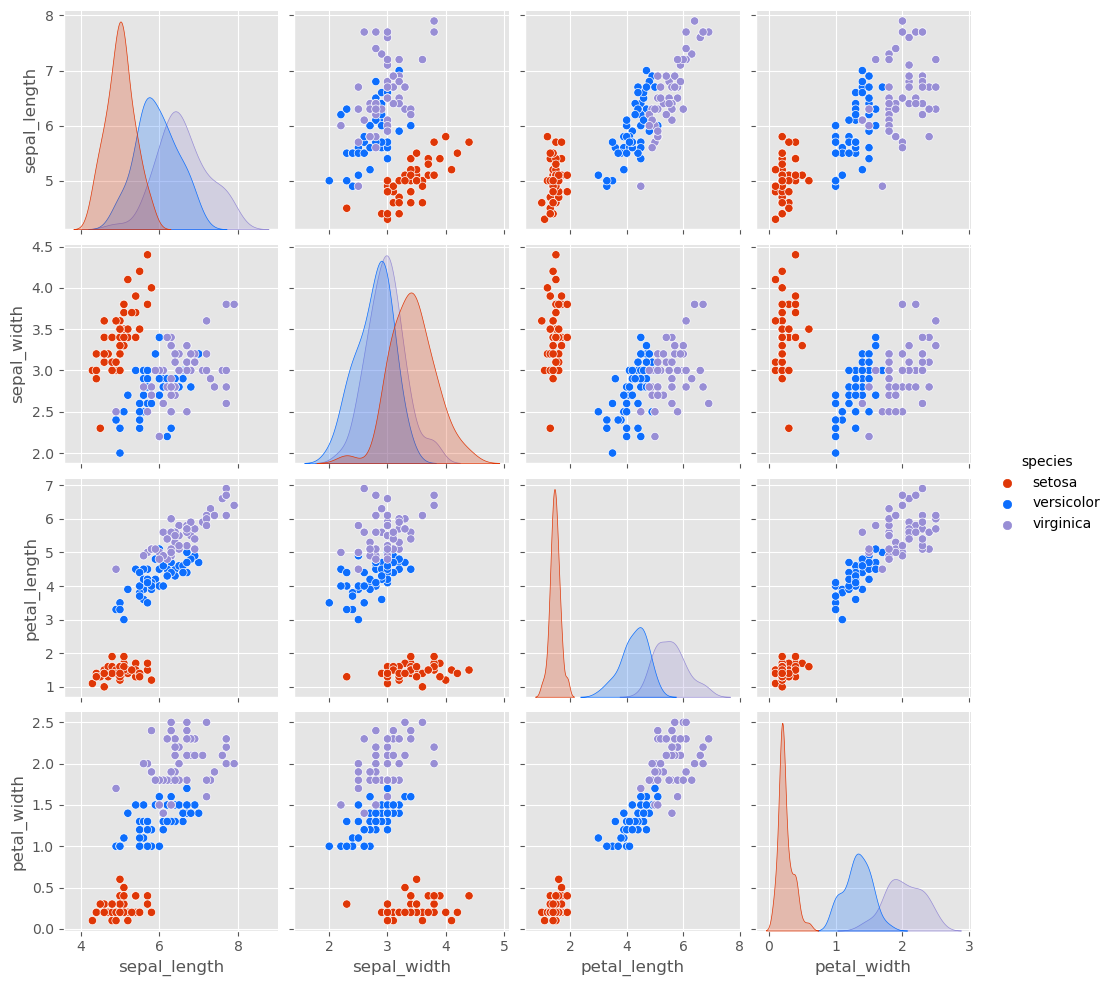

In [5]:
plt.style.use('ggplot')
plt.figure(figsize=(12,8),dpi=200)
sns.pairplot(df,hue='species',palette=palette)
plt.savefig('../static/iris/pairplot.png')

In [3]:
X = df.drop('species',axis=1)
y = df['species']

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=101)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [10]:
def report(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    print(classification_report(y_test,preds))
    ConfusionMatrixDisplay.from_predictions(y_test,preds)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.95      0.95      0.95        22
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



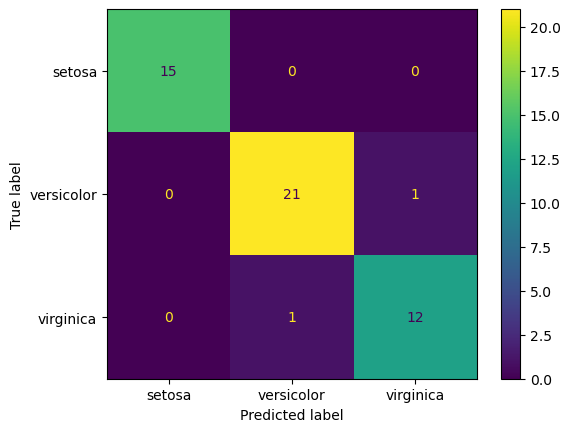

In [11]:
plt.style.use('default')
report(DecisionTreeClassifier(),scaled_X_train, y_train,scaled_X_test, y_test)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.95      0.95      0.95        22
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



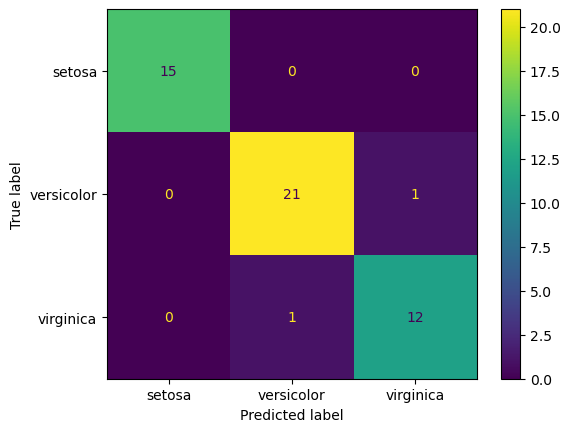

In [12]:
report(RandomForestClassifier(),scaled_X_train, y_train,scaled_X_test, y_test)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.95      0.98        22
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



<Figure size 2400x1600 with 0 Axes>

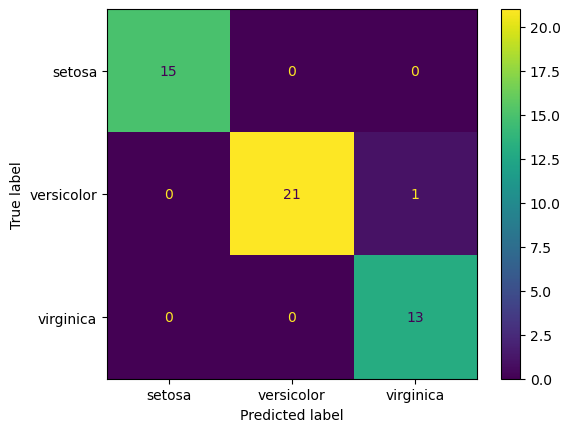

In [13]:
plt.figure(figsize=(12,8),dpi=200)
report(LogisticRegression(),scaled_X_train, y_train,scaled_X_test, y_test)
plt.savefig('../static/iris/confusionmatrix.png')

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.96      1.00      0.98        22
   virginica       1.00      0.92      0.96        13

    accuracy                           0.98        50
   macro avg       0.99      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50



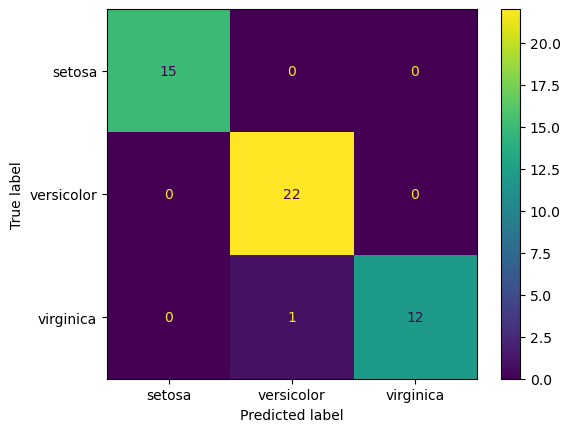

In [14]:
report(KNeighborsClassifier(),scaled_X_train, y_train,scaled_X_test, y_test)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.95      0.98        22
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



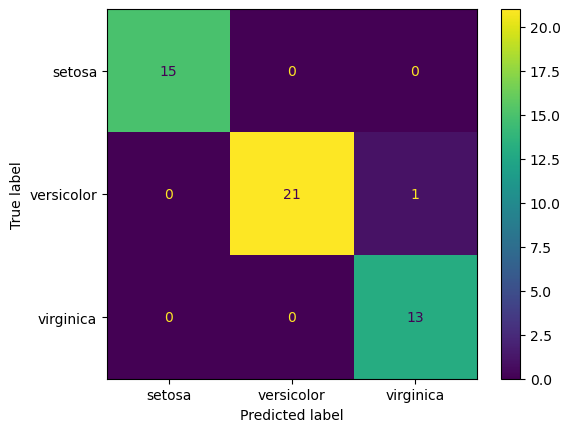

In [15]:
report(SVC(),scaled_X_train, y_train,scaled_X_test, y_test)

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [125]:
model = Sequential()
model.add(Dense(units=4,activation='relu'))
model.add(Dense(units=7,activation='relu'))
model.add(Dense(units=3,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam')

In [81]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train_cat = encoder.fit_transform(y_train)
y_test_cat = encoder.transform(y_test)

In [82]:
y_train_cat

array([0, 1, 1, 2, 0, 0, 1, 0, 1, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 0, 0, 0,
       1, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 2, 0, 1, 2, 1, 2, 2, 2, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 2, 1, 2, 2, 0, 1, 1, 2, 0, 0, 1, 0, 2, 1, 1, 2, 1, 1,
       2, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2])

In [126]:
model.fit(scaled_X_train,y_train_cat,epochs=149,batch_size=4)

Epoch 1/149
25/25 [==============================] - 0s 677us/step - loss: 1.1441
Epoch 2/149
25/25 [==============================] - 0s 721us/step - loss: 1.0977
Epoch 3/149
25/25 [==============================] - 0s 645us/step - loss: 1.0513
Epoch 4/149
25/25 [==============================] - 0s 622us/step - loss: 1.0076
Epoch 5/149
25/25 [==============================] - 0s 676us/step - loss: 0.9624
Epoch 6/149
25/25 [==============================] - 0s 653us/step - loss: 0.9193
Epoch 7/149
25/25 [==============================] - 0s 629us/step - loss: 0.8750
Epoch 8/149
25/25 [==============================] - 0s 587us/step - loss: 0.8346
Epoch 9/149
25/25 [==============================] - 0s 684us/step - loss: 0.7954
Epoch 10/149
25/25 [==============================] - 0s 623us/step - loss: 0.7600
Epoch 11/149
25/25 [==============================] - 0s 647us/step - loss: 0.7296
Epoch 12/149
25/25 [==============================] - 0s 630us/step - loss: 0.6991
Epoch 13/149


In [127]:
preds = model.predict(scaled_X_test)

2/2 [==============================] - 0s 2ms/step


In [128]:
preds = np.argmax(preds,axis=1)

In [120]:
preds.shape

(50,)

In [129]:
preds = encoder.inverse_transform(preds)

In [122]:
preds

array(['versicolor', 'versicolor', 'setosa', 'setosa', 'virginica',
       'virginica', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'setosa', 'setosa', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'setosa', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'setosa', 'setosa'], dtype=object)

In [130]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

      setosa       1.00      0.94      0.97        16
  versicolor       0.88      0.88      0.88        16
   virginica       0.89      0.94      0.92        18

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



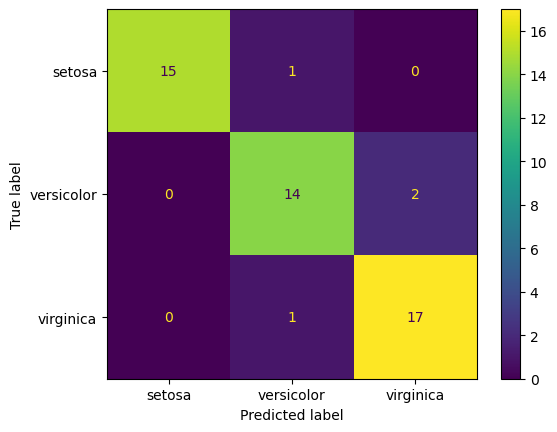

In [131]:
ConfusionMatrixDisplay.from_predictions(y_test,preds)

## Logistic Regression Model

In [16]:
iris_model = LogisticRegression()

In [17]:
X = scaler.fit_transform(X)

In [18]:
iris_model.fit(X,y)

LogisticRegression()

In [19]:
import joblib

In [20]:
joblib.dump(iris_model,'iris_model.pkl')

['iris_model.pkl']

In [21]:
joblib.dump(scaler,'iris_scaler.pkl')

['iris_scaler.pkl']

In [47]:
iris_model.predict([X[0]])[0].title()

'Setosa'